In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')
customers=pd.read_csv('Customers.csv')

In [35]:
customers.head(10)

,CustomerID,CustomerName,Region,SignupDate,SignupYear
0,C0001,Lawrence Carroll,South America,2022-07-10,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022
2,C0003,Michael Rivera,South America,2024-03-07,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022
4,C0005,Laura Weber,Asia,2022-08-15,2022
5,C0006,Brittany Palmer,South America,2024-01-07,2024
6,C0007,Paul Graves,Asia,2022-06-18,2022
7,C0008,David Li,North America,2024-01-13,2024
8,C0009,Joy Clark,Europe,2023-08-14,2023
9,C0010,Aaron Cox,Europe,2022-12-15,2022


In [36]:
transactions.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:00,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:00,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:00,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:00,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:00,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:00,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:00,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:00,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:00,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:00,2,601.36,300.68


In [37]:
products.head(10)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [38]:
print("Customers shape",customers.shape)
print("Products shape",products.shape)
print("transactions shape",transactions.shape)

Customers shape (200, 5)
Products shape (100, 4)
transactions shape (1000, 7)


In [39]:
print(customers.isnull().sum())
print("--"*10)
print(products.isnull().sum())
print("--"*10)
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
SignupYear      0
dtype: int64
--------------------
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
--------------------
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'],format='%d-%m-%Y')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

merged_data = pd.merge(transactions, customers[['CustomerID', 'Region', 'SignupDate']], on='CustomerID', how='left')

merged_data = pd.merge(merged_data, products[['ProductID', 'Category', 'Price']], on='ProductID', how='left')

C:\Users\Vamshi\AppData\Local\Temp\ipykernel_19916\2009124523.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [8]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Region,SignupDate,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:00,1,300.68,300.68,Europe,2022-12-03,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:00,1,300.68,300.68,Asia,2024-09-04,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:00,1,300.68,300.68,Europe,2024-04-04,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:00,2,601.36,300.68,South America,2024-04-11,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:00,3,902.04,300.68,Europe,2022-03-15,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:00,1,459.86,459.86,South America,2022-01-22,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:00,3,1379.58,459.86,North America,2024-04-07,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:00,4,1839.44,459.86,North America,2024-09-21,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:00,2,919.72,459.86,Asia,2024-11-11,Electronics,459.86


In [40]:
merged_data.rename(columns={'Year':'T_Year'},inplace=True)

In [41]:
customers['SignupYear']=customers['SignupDate'].dt.year
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Region,SignupDate,Category,Price_y,T_Year,SignupYear
0,T00001,C0199,P067,2024-08-25 12:38:00,1,300.68,300.68,Europe,2022-12-03,Electronics,300.68,2024,2022
1,T00112,C0146,P067,2024-05-27 22:23:00,1,300.68,300.68,Asia,2024-09-04,Electronics,300.68,2024,2024
2,T00166,C0127,P067,2024-04-25 07:38:00,1,300.68,300.68,Europe,2024-04-04,Electronics,300.68,2024,2024
3,T00272,C0087,P067,2024-03-26 22:55:00,2,601.36,300.68,South America,2024-04-11,Electronics,300.68,2024,2024
4,T00363,C0070,P067,2024-03-21 15:10:00,3,902.04,300.68,Europe,2022-03-15,Electronics,300.68,2024,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:00,1,459.86,459.86,South America,2022-01-22,Electronics,459.86,2024,2022
996,T00759,C0059,P037,2024-06-04 02:15:00,3,1379.58,459.86,North America,2024-04-07,Electronics,459.86,2024,2024
997,T00922,C0018,P037,2024-04-05 13:05:00,4,1839.44,459.86,North America,2024-09-21,Electronics,459.86,2024,2024
998,T00959,C0115,P037,2024-09-29 10:16:00,2,919.72,459.86,Asia,2024-11-11,Electronics,459.86,2024,2024


transaction behavior

In [10]:
transactions_per_cust = merged_data.groupby('CustomerID')['TransactionID'].count().mean()

customer_expenditure = merged_data.groupby('CustomerID')['TotalValue'].sum().mean()

print("\nAverage Transactions Per Customer: {:.2f}".format(int(transactions_per_cust)))
print("\nAverage expenses Per Customer: ${:.2f}".format(customer_expenditure))


Average Transactions Per Customer: 5.00

Average Spend Per Customer: $3467.31


Revenue Trends

In [52]:
region_revenue = merged_data.groupby(['Region', 'T_Year'])['TotalValue'].sum().reset_index()

category_revenue = merged_data.groupby('Category')['TotalValue'].sum().reset_index()

merged_data['T_Year'] = merged_data['TransactionDate'].dt.year
merged_data['SignupYear']=merged_data['SignupDate'].dt.year
revenue_by_year = merged_data.groupby('Year')['TotalValue'].sum().reset_index()

avg_order_value = merged_data['TotalValue'].mean()


print("\nTotal Revenue by Region:\n", region_revenue)
print("\nTotal Revenue by Category:\n", category_revenue)
print("\nYearly Revenue Trends:\n", revenue_by_year)
print("\nAverage Order Value: ${:.2f}".format(avg_order_value))




Total Revenue by Region:
           Region  T_Year  TotalValue
0           Asia    2023     1585.36
1           Asia    2024   150489.61
2         Europe    2023     1272.72
3         Europe    2024   164981.91
4  North America    2023      911.44
5  North America    2024   151401.96
6  South America    2024   219352.56

Total Revenue by Category:
       Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93

Yearly Revenue Trends:
    Year  TotalValue
0  2023     3769.52
1  2024   686226.04

Average Order Value: $690.00


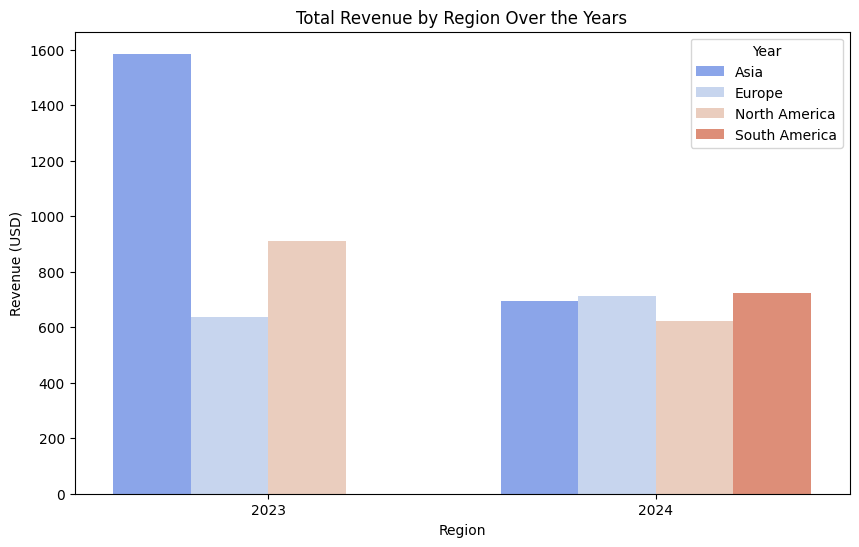

In [62]:
revenue_by_region_year = merged_data.groupby(['Region', 'T_Year'])['TotalValue'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_region_year, x='T_Year', y='TotalValue', hue='Region', palette='coolwarm')
plt.title("Total Revenue by Region Over the Years")
plt.ylabel("Revenue (USD)")
plt.xlabel("Region")
plt.legend(title="Year")
plt.show()

In [57]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Region,SignupDate,Category,Price_y,T_Year,SignupYear,YearMonth
0,T00001,C0199,P067,2024-08-25 12:38:00,1,300.68,300.68,Europe,2022-12-03,Electronics,300.68,2024,2022,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:00,1,300.68,300.68,Asia,2024-09-04,Electronics,300.68,2024,2024,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:00,1,300.68,300.68,Europe,2024-04-04,Electronics,300.68,2024,2024,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:00,2,601.36,300.68,South America,2024-04-11,Electronics,300.68,2024,2024,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:00,3,902.04,300.68,Europe,2022-03-15,Electronics,300.68,2024,2022,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:00,1,459.86,459.86,South America,2022-01-22,Electronics,459.86,2024,2022,2024-10
996,T00759,C0059,P037,2024-06-04 02:15:00,3,1379.58,459.86,North America,2024-04-07,Electronics,459.86,2024,2024,2024-06
997,T00922,C0018,P037,2024-04-05 13:05:00,4,1839.44,459.86,North America,2024-09-21,Electronics,459.86,2024,2024,2024-04
998,T00959,C0115,P037,2024-09-29 10:16:00,2,919.72,459.86,Asia,2024-11-11,Electronics,459.86,2024,2024,2024-09


In [59]:
regional_revenue = pd.merge(transactions, customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Calculate total revenue by region
region_revenue_stats = regional_revenue.groupby('Region')['TotalValue'].sum().reset_index()
region_revenue_stats.columns = ['Region', 'TotalRevenue']

# Display
print(region_revenue_stats)

          Region  TotalRevenue
0           Asia     152074.97
1         Europe     166254.63
2  North America     152313.40
3  South America     219352.56


Customer Insights

In [10]:
customer_region_stats = customers['Region'].value_counts().reset_index()
customer_region_stats.columns = ['Region', 'CustomerCount']

customers['SignupYear'] = customers['SignupDate'].dt.year
signup_year_stats = customers['SignupYear'].value_counts().reset_index()
signup_year_stats.columns = ['SignupYear', 'CustomerCount']

print("Regional Distribution of Customers:\n", customer_region_stats)
print("\nCustomer Signups Per Year:\n", signup_year_stats)

Regional Distribution of Customers:
           Region  CustomerCount
0  South America             59
1         Europe             50
2  North America             46
3           Asia             45

Customer Signups Per Year:
    SignupYear  CustomerCount
0        2024             79
1        2022             64
2        2023             57


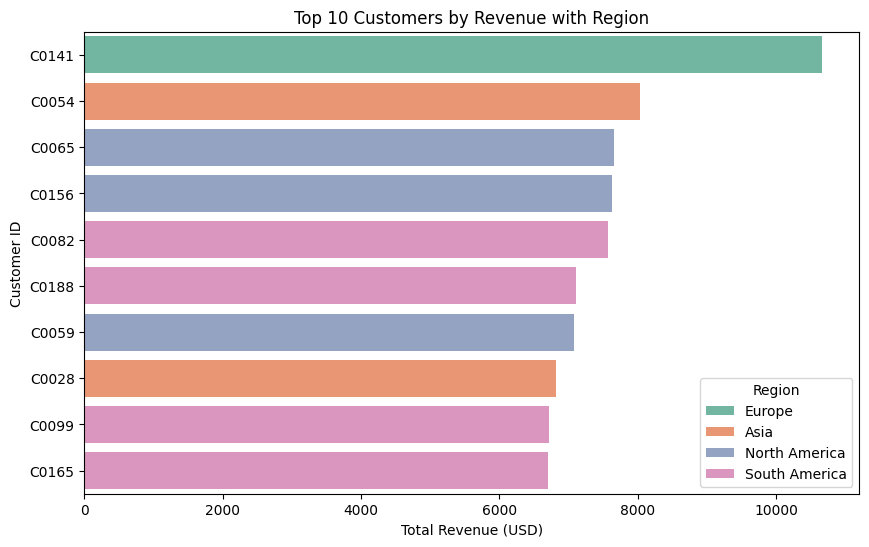

In [29]:
top_customers = merged_data.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index()
top_customers = top_customers.sort_values('TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='TotalValue', y='CustomerID', hue='Region', palette='Set2')
plt.title("Top 10 Customers by Revenue with Region")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Customer ID")
plt.show()

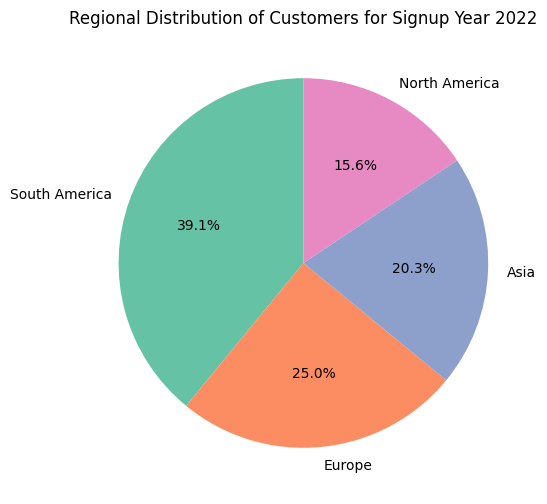

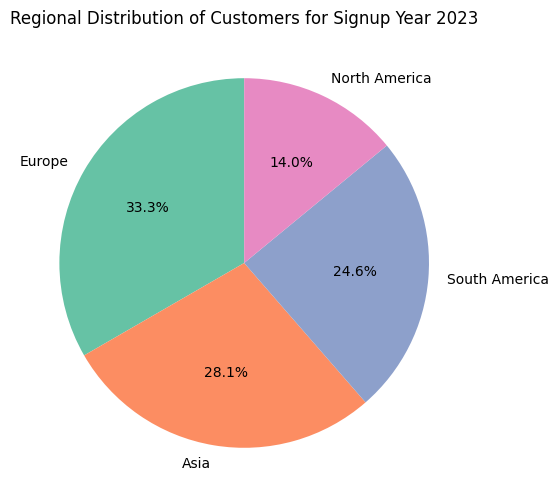

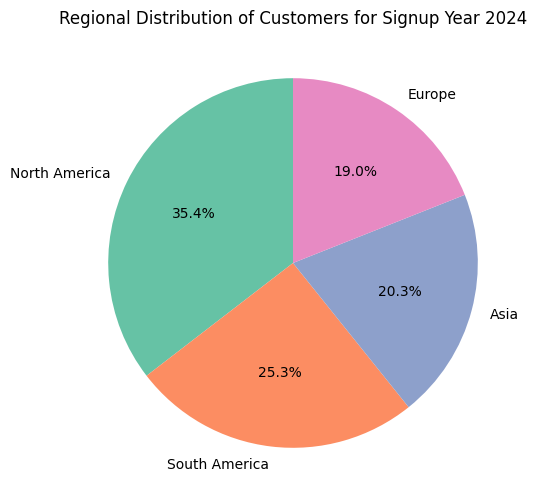

In [33]:
for year in sorted(customers['SignupYear'].unique()):
    data_year = customers[customers['SignupYear'] == year]
    region_counts = data_year['Region'].value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title(f"Regional Distribution of Customers for Signup Year {year}")
    plt.show()

Product Prices

In [22]:
category_price_stats = products.groupby('Category')['Price'].agg(
    mean_price='mean',
    median_price='median',
    min_price='min',
    max_price='max',
    std_dev='std',
    product_count='count'
).reset_index()

print("\nProduct Price Statistics by Category:\n")
category_price_stats


Product Price Statistics by Category:



,Category,mean_price,median_price,min_price,max_price,std_dev,product_count
0,Books,292.212308,337.94,33.59,497.76,153.800135,26
1,Clothing,263.720000,303.50,18.82,481.78,157.965038,25
2,Electronics,275.353462,282.72,16.08,459.86,137.056612,26
3,Home Decor,235.020000,235.58,41.18,454.53,122.236552,23


Top 3 products sold annually

In [26]:

prod_sold_annual = merged_data.groupby(['Year', 'ProductID']).agg(
    total_revenue=('TotalValue', 'sum')
).reset_index()

prod_sold_annual = pd.merge(prod_sold_annual, products[['ProductID', 'ProductName']], on='ProductID', how='left')

top_products_per_year = prod_sold_annual.sort_values(['Year', 'total_revenue'], ascending=[True, False]).groupby('Year').head(3)

top_products_per_year

,Year,ProductID,total_revenue,ProductName
0,2023,P020,1585.36,ActiveWear Jacket
1,2023,P057,958.80,ActiveWear Smartphone
3,2023,P083,911.44,ActiveWear Smartwatch
32,2024,P029,19513.80,TechPro Headphones
82,2024,P079,17946.91,ActiveWear Rug
51,2024,P048,17905.20,TechPro Cookbook


In [25]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Region,SignupDate,Category,Price_y,Year,SignupYear
0,T00001,C0199,P067,2024-08-25 12:38:00,1,300.68,300.68,Europe,2022-12-03,Electronics,300.68,2024,2022
1,T00112,C0146,P067,2024-05-27 22:23:00,1,300.68,300.68,Asia,2024-09-04,Electronics,300.68,2024,2024
2,T00166,C0127,P067,2024-04-25 07:38:00,1,300.68,300.68,Europe,2024-04-04,Electronics,300.68,2024,2024
3,T00272,C0087,P067,2024-03-26 22:55:00,2,601.36,300.68,South America,2024-04-11,Electronics,300.68,2024,2024
4,T00363,C0070,P067,2024-03-21 15:10:00,3,902.04,300.68,Europe,2022-03-15,Electronics,300.68,2024,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:00,1,459.86,459.86,South America,2022-01-22,Electronics,459.86,2024,2022
996,T00759,C0059,P037,2024-06-04 02:15:00,3,1379.58,459.86,North America,2024-04-07,Electronics,459.86,2024,2024
997,T00922,C0018,P037,2024-04-05 13:05:00,4,1839.44,459.86,North America,2024-09-21,Electronics,459.86,2024,2024
998,T00959,C0115,P037,2024-09-29 10:16:00,2,919.72,459.86,Asia,2024-11-11,Electronics,459.86,2024,2024
